In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard

from keras.models import load_model

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
# Noisy Digits

In [ ]:
n = 10
plt.figure(figsize=(20, 2))

In [ ]:
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [3]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])




Train on 60000 samples, validate on 10000 samples







Epoch 1/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.1909 - val_loss: 0.1336

Epoch 2/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1329 - val_loss: 0.1287
Epoch 3/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1253 - val_loss: 0.1226
Epoch 4/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1211 - val_loss: 0.1167
Epoch 5/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1185 - val_loss: 0.1165
Epoch 6/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1167 - val_loss: 0.1162
Epoch 7/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1153 - val_loss: 0.1128
Epoch 8/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1142 - val_loss: 0.1122
Epoch 9/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1135 - v

60000/60000 [==============================] - 5s 76us/step - loss: 0.1062 - val_loss: 0.1059
Epoch 56/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1063 - val_loss: 0.1058
Epoch 57/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1062 - val_loss: 0.1074
Epoch 58/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.1061 - val_loss: 0.1057
Epoch 59/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1061 - val_loss: 0.1077
Epoch 60/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.1060 - val_loss: 0.1057
Epoch 61/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1060 - val_loss: 0.1058
Epoch 62/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1060 - val_loss: 0.1053
Epoch 63/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1060 - val_loss: 0.1055
Epoch 64/100
60000/60000 [========================

In [5]:
autoencoder.save('../models/denoise_e100_b128.h5') 

In [6]:
decoded_imgs = autoencoder.predict(x_test_noisy)

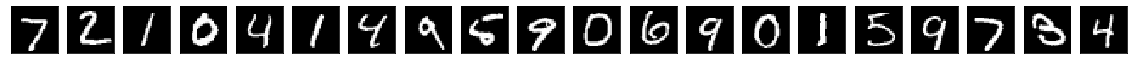

In [9]:
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

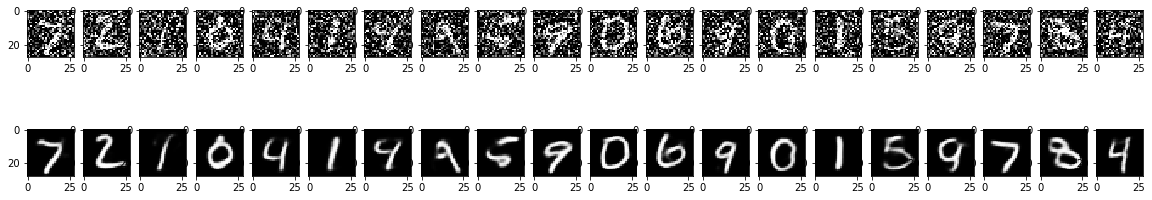

In [8]:

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()

# References

https://stackoverflow.com/questions/42763094/how-to-save-final-model-using-keras